In [6]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### Rating average/count by day

In [12]:
data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).count()
day_average.head()


,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


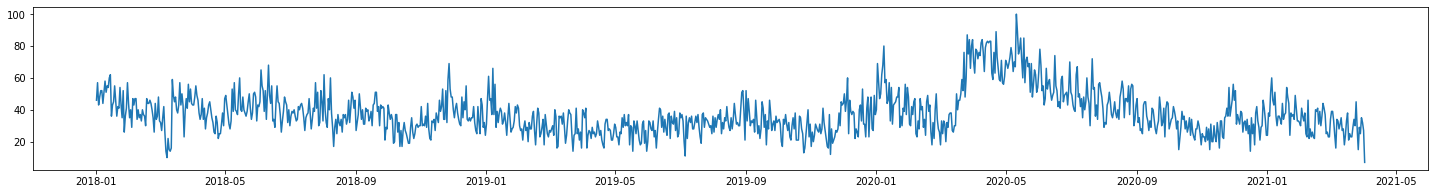

In [13]:
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

### Rating average by week

In [14]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(["Week"]).mean()
week_average['Rating']

Week
2018-00    4.434564
2018-01    4.424933
2018-02    4.417702
2018-03    4.401024
2018-04    4.468085
             ...   
2021-09    4.560096
2021-10    4.627315
2021-11    4.629121
2021-12    4.607843
2021-13    4.429032
Name: Rating, Length: 173, dtype: float64

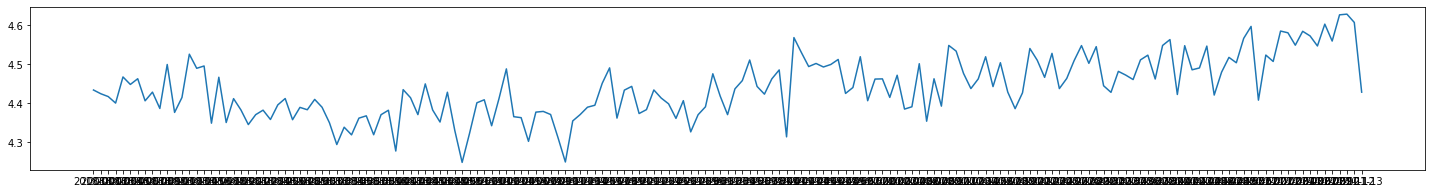

In [17]:
plt.figure(figsize=(25,3))
plt.plot(week_average.index, week_average['Rating'])

### Average rating by month

In [18]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()
month_average['Rating']

Month
2018-01    4.429645
2018-02    4.436248
2018-03    4.421671
2018-04    4.468211
2018-05    4.396420
2018-06    4.375379
2018-07    4.393184
2018-08    4.344753
2018-09    4.347247
2018-10    4.374429
2018-11    4.386817
2018-12    4.342105
2019-01    4.401920
2019-02    4.346964
2019-03    4.333145
2019-04    4.420049
2019-05    4.405569
2019-06    4.398559
2019-07    4.382353
2019-08    4.417059
2019-09    4.451135
2019-10    4.483871
2019-11    4.493260
2019-12    4.471046
2020-01    4.439615
2020-02    4.428642
2020-03    4.480690
2020-04    4.475220
2020-05    4.448082
2020-06    4.482812
2020-07    4.517508
2020-08    4.470987
2020-09    4.485862
2020-10    4.515201
2020-11    4.479306
2020-12    4.528358
2021-01    4.551325
2021-02    4.567901
2021-03    4.589207
2021-04    4.544118
Name: Rating, dtype: float64

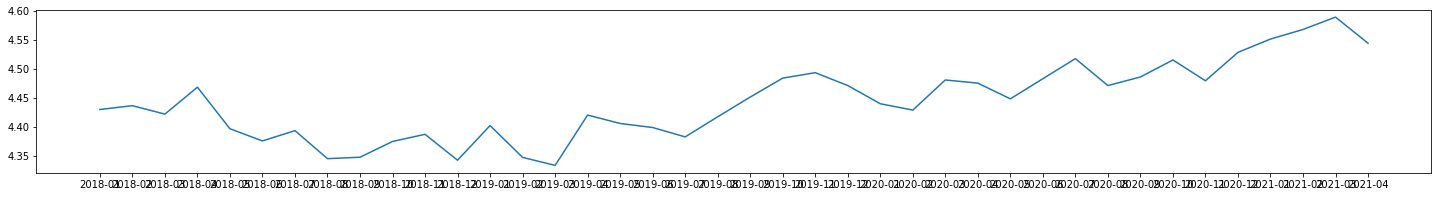

In [19]:
plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average['Rating'])

### Average rating by month by course

In [23]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()
month_average_crs

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085
2018-06,4.268293,NaN,4.631579,4.204545,4.333333,4.273876,NaN,4.421264
2018-07,4.589286,NaN,4.159091,4.065217,4.277778,4.330239,NaN,4.436156
2018-08,4.353659,NaN,4.411765,4.233333,4.100000,4.283388,NaN,4.376494
2018-09,4.238636,NaN,4.173913,4.500000,4.166667,4.247967,NaN,4.416413


<AxesSubplot:xlabel='Month'>

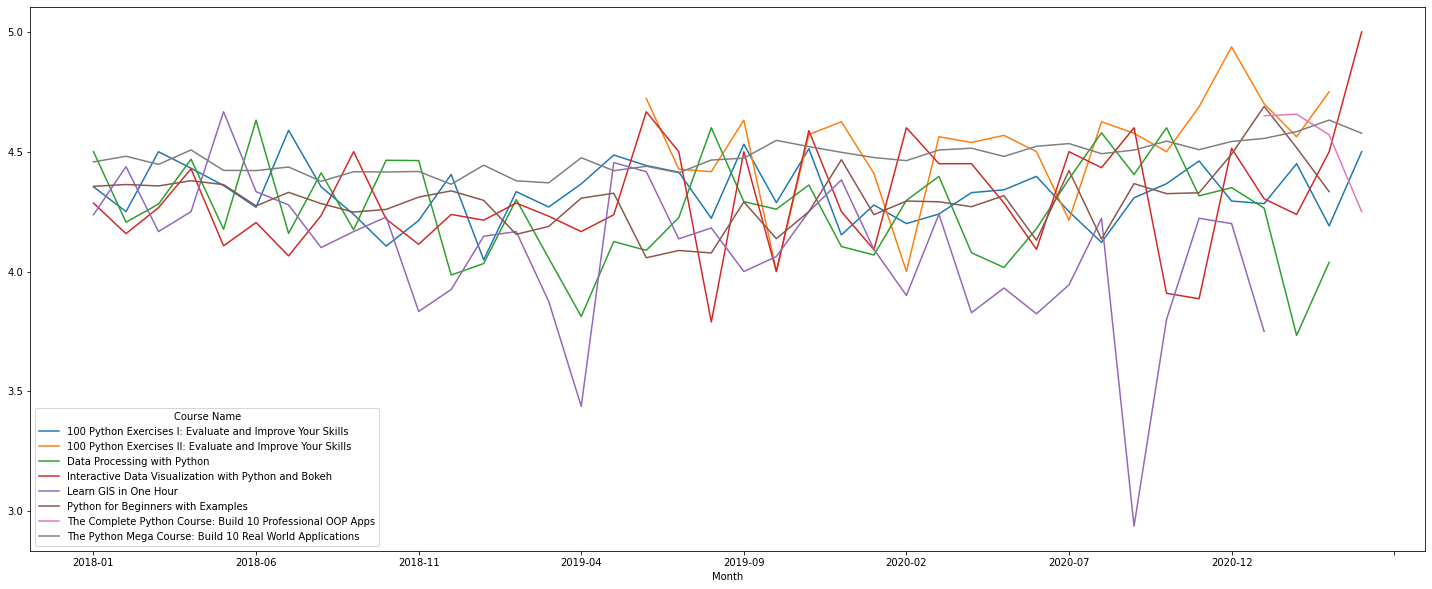

In [24]:
month_average_crs.plot(figsize=(25, 10))

### What day are people the happiest?

In [32]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday']).mean()
weekday_average

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


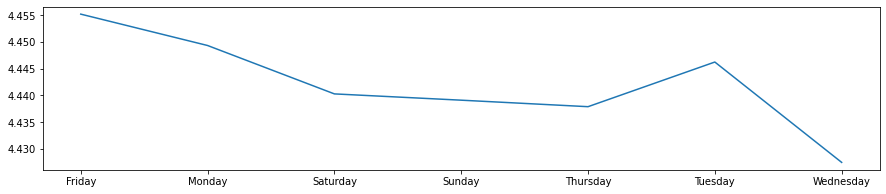

In [33]:
plt.figure(figsize=[15, 3])
plt.plot(weekday_average.index, weekday_average['Rating'])

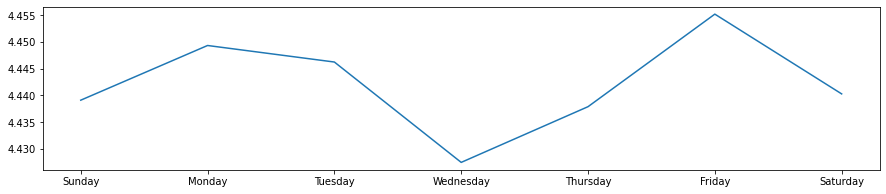

In [35]:
data['Weekday'] = data['Timestamp'].dt.strftime("%A")
data['Daynumber'] = data['Timestamp'].dt.strftime("%w")

weekday_average_2 = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average_2 = weekday_average.sort_values('Daynumber')

plt.figure(figsize=[15, 3])
plt.plot(weekday_average_2.index.get_level_values(0), weekday_average['Rating'])